In [31]:
#ファイル名の取得に使用
import os
#画像処理に使用
import cv2
import mediapipe as mp
#静止画表示に使用
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
hands = mp.solutions.hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)

blank = cv2.flip(cv2.imread('./blank.png'), 1)
image = cv2.flip(cv2.imread('./hands/2.jpg'), 1)
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [33]:
results.multi_handedness

[classification {
   index: 0
   score: 0.9933165311813354
   label: "Left"
 }]

In [34]:
landmark_list = ['WRIST', 'THUMP_CMC', 'THUMB_MCP', 'THUMB_IP', 'THUMB_TIP', 'INDEX_FINGER_MCP', 'INDEX_FINGER_PIP', 'INDEX_FINGER_DIP', 'INDEX_FINGER_TIP', 'MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP', 'RING_FINGER_MCP', 'RING_FINGER_PIP', 'RING_FINGER_DIP', 'RING_FINGER_TIP', 'PINKY_MCP', 'PINKY_PIP', 'PINKY_DIP', 'PINKY_TIP']

for hand_landmarks in results.multi_hand_landmarks:
    for i in range(21):
        print(landmark_list[i])
        print(hand_landmarks.landmark[i])

WRIST
x: 0.7110926508903503
y: 0.7110981345176697
z: 8.48238016715186e-07

THUMP_CMC
x: 0.7175559401512146
y: 0.6267827153205872
z: -0.0435265377163887

THUMB_MCP
x: 0.6749523878097534
y: 0.5665730834007263
z: -0.06297875940799713

THUMB_IP
x: 0.6208875179290771
y: 0.6145052909851074
z: -0.07917120307683945

THUMB_TIP
x: 0.5740932822227478
y: 0.6570247411727905
z: -0.09303862601518631

INDEX_FINGER_MCP
x: 0.5889132022857666
y: 0.4930669069290161
z: -0.03579609841108322

INDEX_FINGER_PIP
x: 0.5274565815925598
y: 0.40112295746803284
z: -0.06723884493112564

INDEX_FINGER_DIP
x: 0.4886567294597626
y: 0.3422180712223053
z: -0.08530427515506744

INDEX_FINGER_TIP
x: 0.4518101215362549
y: 0.3005736768245697
z: -0.09453988820314407

MIDDLE_FINGER_MCP
x: 0.5663352012634277
y: 0.5657898187637329
z: -0.03443271666765213

MIDDLE_FINGER_PIP
x: 0.4814186096191406
y: 0.5342745780944824
z: -0.07295647263526917

MIDDLE_FINGER_DIP
x: 0.4277304410934448
y: 0.5088672041893005
z: -0.09538719058036804

MIDDL

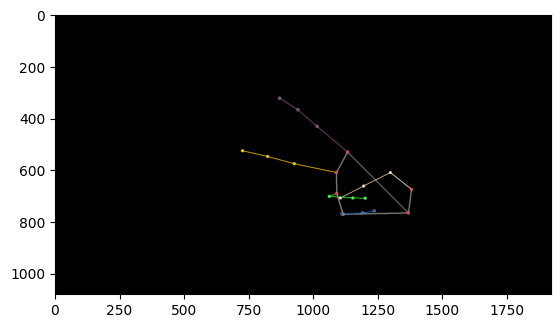

In [35]:
# annotated_image = image.copy()
annotated_image = blank.copy()
for hand_landmarks in results.multi_hand_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp.solutions.hands.HAND_CONNECTIONS,
            mp.solutions.drawing_styles.get_default_hand_landmarks_style(),
            mp.solutions.drawing_styles.get_default_hand_connections_style()
            )
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))